In [ ]:
pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 137.7 MB/s eta 0:00:00


In [ ]:
# Imports
import os
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch
from scipy.spatial.distance import cosine
from transformers import BertTokenizer, BertModel
import csv


In [ ]:

# Load the BlueBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12")

# Load the BlueBERT model
model = AutoModel.from_pretrained("bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12")

Some weights of the model checkpoint at bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12 were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


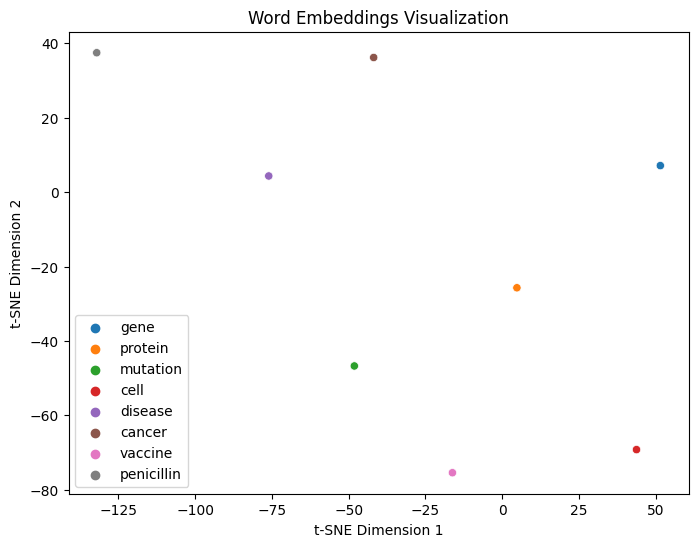

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Set up BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Set of words for which embeddings will be created
word_list = ['gene', 'protein', 'mutation', 'cell', 'disease', 'cancer', 'vaccine', 'penicillin']

# Create empty lists to store word embeddings and labels
embeddings = []
labels = []

# Iterate over each word in the word list
for word in word_list:
    # Tokenize the word and obtain input tensors
    inputs = tokenizer(word, return_tensors='pt')
    with torch.no_grad():
        # Pass the input tensors through the BERT model
        outputs = model(**inputs)
        # Extract the embedding for the [CLS] token (the first token)
        embedding = outputs.last_hidden_state[:, 0, :].numpy()
        # Add the embedding and label to the respective lists
        embeddings.append(embedding)
        labels.append(word)

# Concatenate the embeddings into a single array
embeddings = np.concatenate(embeddings, axis=0)

# Apply dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # Lower perplexity value
embeddings_tsne = tsne.fit_transform(embeddings)

# Plot the word embeddings in the vector space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=embeddings_tsne[:, 0], y=embeddings_tsne[:, 1], hue=labels, legend='full')
plt.title('Word Embeddings Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# ... Rest of the code ...

#BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


# Input words
input_words = ["Bacteria", "Gene", "Protein"]

# Get embeddings for the input words
embeddings = []
for word in input_words:
    inputs = tokenizer(word, return_tensors='pt')
    outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()
    embeddings.append(embedding)

# Create a list of all the embeddings
all_embeddings = embeddings + list(vocab_embeddings.values())

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(all_embeddings)

# Create a list of all the words (including the input words)
all_words = input_words + list(vocab_embeddings.keys())

# Visualize cosine similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=all_words, yticklabels=all_words)
plt.title('Cosine Similarity Between Words')
plt.xlabel('Words')
plt.ylabel('Words')
plt.show()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


NameError: ignored

# **Hayat's dataset - importing & cleaning -> making into list of gene names**

In [ ]:
df = pd.read_csv('/content/Genes_list_2.csv', header = None)
print(df)
type(df)

        0
0    RTL1
1    RTL2
2    RTL3
3    RTL4
4    DCL1
5    DCL2
6    DCL3
7    DCL4
8    HEN1
9    HEN2
10   SGS3
11   RDR1
12   RDR2
13   RDR6
14   AGO1
15   AGO2
16   AGO3
17   AGO4
18   AGO5
19   AGO6
20   AGO7
21   AGO8
22   AGO9
23  AGO10
24  GAPDH
25   DCP1
26   XRN2
27   XRN3
28   XRN4
29   CUC1
30   CUC2
31   CUC3
32   SKI2
33   SKI3


pandas.core.frame.DataFrame

In [ ]:
data_list = df.values.tolist()


#flatten

flattened_list = []

for element in data_list:
    if isinstance(element, list):
        flattened_list.extend(element)
    else:
        flattened_list.append(element)

print(flattened_list)

final = flattened_list

['RTL1', 'RTL2', 'RTL3', 'RTL4', 'DCL1', 'DCL2', 'DCL3', 'DCL4', 'HEN1', 'HEN2', 'SGS3', 'RDR1', 'RDR2', 'RDR6', 'AGO1', 'AGO2', 'AGO3', 'AGO4', 'AGO5', 'AGO6', 'AGO7', 'AGO8', 'AGO9', 'AGO10', 'GAPDH', 'DCP1', 'XRN2', 'XRN3', 'XRN4', 'CUC1', 'CUC2', 'CUC3', 'SKI2', 'SKI3']


In [ ]:
# cleaned_list = [s.replace('\xa0', '') for s in flattened_list]
# print(cleaned_list)

# final = cleaned_list

['AT3G16670', 'AT1G22900', 'AT2G43590', 'AT3G27400', 'AT1G66830', 'AT4G19810', 'AT3G16660', 'AT2G19990', 'AT1G77510', 'AT4G37870', 'AT5G62150', 'AT5G11090', 'AT2G41660', 'AT3G51060', 'AT3G04720', 'AT3G05730', 'AT4G23290', 'AT4G23300', 'AT1G56710', 'AT1G68560', 'AT2G18980', 'AT1G68570', 'AT2G24260', 'AT2G43610', 'AT4G00870', 'AT5G49138', 'AT5G46730', 'AT1G19640', 'AT5G66350', 'AT5G45650', 'AT2G04160', 'AT2G38940', 'AT2G29995', 'AT3G60900', 'AT3G45650', 'AT4G23550', 'AT4G04900', 'AT5G14330', 'AT5G26220', 'AT5G60970', 'AT3G22142', 'AT5G11320', 'AT4G21215', 'AT3G10120', 'AT4G12290', 'AT5G44670', 'AT5G48500', 'AT5G03890', 'AT3G25870', 'AT3G10190', 'AT3G25640', 'AT3G48290', 'AT1G62510', 'AT3G22540', 'AT4G24120', 'AT3G25710', 'AT1G02460', 'AT5G19530', 'AT1G71880', 'AT5G25110', 'AT2G33810', 'AT5G28030', 'AT1G78000', 'AT1G28230', 'AT5G59720', 'AT4G12900', 'AT1G11220', 'AT2G41220']


In [ ]:
# genes = [str(item) for item in flattened_list]
# print(genes)
# final = genes

['PSY3', 'At2g43610', 'DES1', 'SUC1', 'At3g27400', 'PUP1', 'At5g14330', 'At5g14330', 'PR-1-LIKE', 'GALS2', 'MJE7.14', 'CIPK25', 'At3g05730', 'ChiC', 'RIC10', 'At1g62510', 'CRK22', 'SHI', 'SBT5.6', 'At3g10120', '\u200b\u200bMTG10.18', 'MIZ1', 'SRS1', 'NPF2.7', 'LRL1', 'BHLH32', 'At1g11220', 'PER16', 'WRKY29', 'GLU2', 'At3g25640', 'YSL1', 'HSP18.1', 'At4g12900', 'PHT1-4', 'DIR11', 'CRK21', 'CYP71A24', 'At4g12290', 'F8F6_100', 'At3g22540', 'TCP5', 'YUC4', 'At3g16660', 'At3g25870', 'At4g21215', 'NPF3.1', 'T14P4.18', 'GGCT2_1', 'PDIL1-2', 'BHLH14', 'JMT', 'At3g22142', 'SULTR1_2', 'CML36', 'At1g66830', 'AIR3', 'At1g56710', 'At5g11090', 'PCK1', 'XYL1', 'FLA10', 'HEL', 'At3g16670']


In [ ]:
from transformers import AutoTokenizer

# load the BioBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12")


# add the genes to the vocabulary using whichever list you want (in this case Hayat's genes)
num_added_tokens = tokenizer.add_tokens(final)


print("Number of added tokens:", num_added_tokens)

Number of added tokens: 34


In [ ]:
vocab = tokenizer.get_vocab()

# Print the final vocabulary
print(vocab)

len(vocab)


{'reynolds': 9579, '##氷': 30421, '[unused194]': 199, '♯': 1628, 'roe': 20944, 'binding': 8031, 'promotes': 14067, 'nests': 17415, '##eng': 13159, 'scripture': 18919, '##ped': 5669, 'ط': 1286, 'peruvian': 15432, 'tsunami': 19267, 'sustain': 15770, 'rabbit': 10442, 'meters': 5563, 'chord': 13924, '##icative': 25184, 'photographs': 7008, 'depot': 8470, 'offended': 15807, '##berman': 23991, 'fitted': 7130, 'nutrients': 20435, 'viewers': 7193, 'perceptions': 23271, 'furnace': 17533, 'therese': 25598, 'torches': 24711, '##hy': 10536, 'tested': 7718, 'rainfall': 10101, '##oper': 25918, '##piration': 16781, 'treatment': 3949, 'dex': 20647, '[unused474]': 479, 'entrances': 18084, 'picks': 11214, '##pic': 24330, 'madonna': 11284, 'invitation': 8468, 'models': 4275, 'emotions': 6699, 'swamp': 11963, 'hamas': 22129, 'bound': 5391, 'entrepreneurs': 17633, 'bribe': 26470, '##pone': 29513, '##thy': 16921, '##anor': 27869, '[unused532]': 537, 'ة': 1272, 'auditorium': 11448, 'retreated': 11672, 'hallma

30556

In [ ]:
from transformers import AutoTokenizer

# Load the BioBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12")

# Print the original vocabulary size
print("Original vocab size:", len(tokenizer))

# Define a list of words to add to the vocabulary
new_words = final

# Add the words to the vocabulary
num_added_tokens = tokenizer.add_tokens(new_words)

# Print the new vocabulary size
print("New vocab size:", len(tokenizer))

# Check if a specific word is in the updated vocabulary
if "AT1G22900" in tokenizer.get_vocab():
    print("word is in the updated vocabulary!")
else:
    print("word is NOT in the updated vocabulary.")

Original vocab size: 30522
New vocab size: 30556
word is NOT in the updated vocabulary.


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.neighbors import NearestNeighbors

# # Set up BioBERT tokenizer and model
# tokenizer = AutoTokenizer.from_pretrained("bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12")
# model = AutoModel.from_pretrained("bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12")

# Set up BioBERT tokenizer and model
# tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-v1.1")
# model = AutoModel.from_pretrained("dmis-lab/biobert-v1.1")

#BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


# Input word
input_word = "DCL3"

# Get embeddings for the input word
inputs1 = tokenizer(input_word, return_tensors='pt')
outputs1 = model(**inputs1)
embedding1 = outputs1.last_hidden_state.mean(dim=1).squeeze().detach().numpy()

# Specify the specific set of words for the vocabulary
specific_words = final

# Find the embeddings and words for the specific set of words
vocab_embeddings = {}
for word in specific_words:
    if len(word) >= 2:
        inputs = tokenizer(word, return_tensors='pt')
        outputs = model(**inputs)
        embedding = outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()
        vocab_embeddings[word] = embedding

# Use KNN to find the most similar words to the input word within the specific vocabulary
n_neighbors = 33
nn = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
nn.fit(list(vocab_embeddings.values()))
distances, indices = nn.kneighbors([embedding1], return_distance=True)

# Print the closest words to the input word
print("Closest words to '%s':" % input_word)
for i in range(n_neighbors):
    closest_word = list(vocab_embeddings.keys())[indices[0][i]]
    distance = distances[0][i]
    print(closest_word, distance)


Closest words to 'DCL3':
DCL3 0.0
DCL4 0.013394237
DCL2 0.015472412
DCL1 0.021408796
DCP1 0.069975376
RTL3 0.102314174
SGS3 0.10335851
AGO3 0.11112815
RTL1 0.11151111
RDR1 0.118398845
RTL4 0.1208297
CUC3 0.121474266
AGO1 0.12315726
RTL2 0.12429428
HEN2 0.124470115
AGO4 0.12501794
AGO2 0.12545997
RDR2 0.12555772
SKI2 0.12587804
SKI3 0.12834668
AGO5 0.12849188
CUC1 0.13011998
HEN1 0.1307528
CUC2 0.13241005
AGO7 0.1335082
AGO8 0.14129424
AGO6 0.14346343
AGO9 0.14359558
GAPDH 0.14793152
XRN3 0.15046245
AGO10 0.15339911
RDR6 0.15668005
XRN2 0.16433156


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.neighbors import NearestNeighbors

# Set up BioBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12")
model = AutoModel.from_pretrained("bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12")

# Input word
word1 = "MIZ1"

# Tokenize the input word and retrieve the subtokens
input_tokens = tokenizer.tokenize(word1)

# Get embeddings for word1 subtokens
inputs1 = tokenizer(word1, return_tensors='pt')
outputs1 = model(**inputs1)
embedding1 = outputs1.last_hidden_state.mean(dim=1).squeeze().detach().numpy()

# Find the embeddings and words for all words in the vocabulary
words = list(vocab.keys()) # Limit the number of words for demonstration
vocab_embeddings = {}

# Process words in batches for efficiency
batch_size = 16
num_batches = (len(words) + batch_size - 1) // batch_size

for i in range(num_batches):
    batch = words[i * batch_size: (i + 1) * batch_size]
    tokenized_batch = tokenizer(batch, padding=True, truncation=True, return_tensors='pt')
    outputs = model(**tokenized_batch)
    batch_embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()

    for j, word in enumerate(batch):
        full_word = tokenizer.decode(tokenized_batch.input_ids[j], skip_special_tokens=True)
        vocab_embeddings[full_word] = batch_embeddings[j]

# Use KNN to find the most similar words to the input word
n_neighbors = 64
nn = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
nn.fit(list(vocab_embeddings.values()))
distances, indices = nn.kneighbors([embedding1], return_distance=True)

# Print the closest words to the input word
print("Closest words to '%s':" % word1)
for i in range(n_neighbors):
    closest_word = list(vocab_embeddings.keys())[indices[0][i]]
    distance = distances[0][i].item()
    print(closest_word, distance)


Some weights of the model checkpoint at bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12 were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predef

Closest words to 'MIZ1':
miz1 5.960464477539063e-08
ysl1 0.11171954870223999
pck1 0.11594820022583008
srs1 0.11699938774108887
lrl1 0.11728781461715698
pup1 0.11838549375534058
suc1 0.11864745616912842
xyl1 0.12000882625579834
crk22 0.12069034576416016
gals2 0.12260901927947998
marches 0.13348007202148438
ric10 0.13429558277130127
clasped 0.13438349962234497
tcp5 0.1357855200767517
cml36 0.13579803705215454
nominate 0.13603955507278442
delaney 0.1369781494140625
hears 0.13799530267715454
irina 0.1385653018951416
bey 0.13926184177398682
shady 0.13972818851470947
jimi 0.1399240493774414
nicknamed 0.14000773429870605
hitler 0.14028817415237427
legions 0.14053726196289062
carthage 0.14054667949676514
hesitated 0.1405971646308899
surreal 0.14069074392318726
doomed 0.14069116115570068
caravan 0.14111840724945068
nominee 0.1411268711090088
hardcover 0.1414393186569214
nodding 0.1414867639541626
crk21 0.14167803525924683
hitter 0.141773521900177
brennan 0.14188671112060547
gifford 0.1419345140

# **Clustering the 68 genes using BlueBERT**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


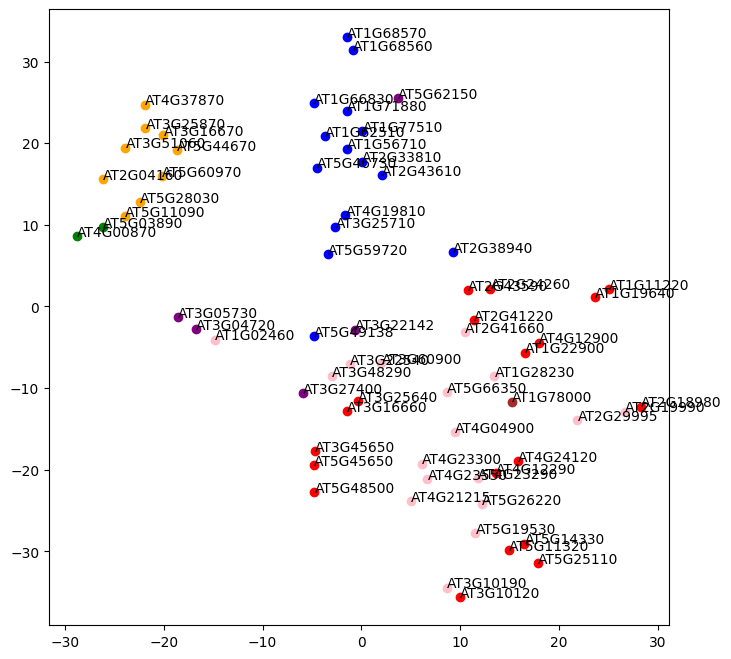

In [ ]:
from transformers import AutoTokenizer, AutoModel
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt




# Generate embeddings for the words using the BioBERT model
embeddings = []
for word in genes:
    # Tokenize the word and convert it to a tensor
    input_ids = torch.tensor(tokenizer.encode(word)).unsqueeze(0)
    # Get the embeddings for the tokenized input
    with torch.no_grad():
        output = model(input_ids)
    # Extract the final hidden state of the first token (the [CLS] token)
    embedding = output[0][:, 0, :].numpy()
    embeddings.append(embedding)

# Reshape the embeddings to remove the third dimension
embeddings = np.array(embeddings)
n_samples, n_dims, _ = embeddings.shape
embeddings = embeddings.reshape(n_samples, n_dims * _)

# Apply KMeans clustering to the embeddings
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(embeddings)

# Get the labels for each word
labels = kmeans.labels_

tsne = TSNE(n_components=2, perplexity =5)
embeddings_tsne = tsne.fit_transform(embeddings)

# Plot the embeddings in a scatter plot
plt.figure(figsize=(8, 8))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray','olive']
for i in range(n_clusters):
    cluster_words = [genes[j] for j in range(len(genes)) if labels[j] == i]
    cluster_embeddings = embeddings_tsne[labels == i]
    x = cluster_embeddings[:, 0]
    y = cluster_embeddings[:, 1]
    plt.scatter(x, y, color=colors[i])
    for j, word in enumerate(cluster_words):
        plt.annotate(word, (x[j], y[j]))
plt.show()

# **Only giving clusters and the lnegth of the cluster**

In [ ]:
from transformers import AutoTokenizer, AutoModel
import numpy as np
from sklearn.cluster import KMeans

# Define a list of words to cluster
words = genes

# Generate embeddings for the words using the BlueBERT model
embeddings = []
for word in words:
    # Tokenize the word and convert it to a tensor
    input_ids = torch.tensor(tokenizer.encode(word)).unsqueeze(0)
    # Get the embeddings for the tokenized input
    with torch.no_grad():
        output = model(input_ids)
    # Extract the final hidden state of the first token (the [CLS] token)
    embedding = output[0][:, 0, :].numpy()
    embeddings.append(embedding)

# Reshape the embeddings to remove the third dimension
embeddings = np.array(embeddings)
n_samples, n_dims, _ = embeddings.shape
embeddings = embeddings.reshape(n_samples, n_dims * _)

# Apply KMeans clustering to the embeddings
# Apply KMeans clustering to the embeddings
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(embeddings)

# Get the labels for each word
labels = kmeans.labels_

# Group words by their cluster label
cluster_words = [[] for i in range(n_clusters)]
for i in range(len(words)):
    cluster_words[labels[i]].append(words[i])

# Print the words in each cluster
for i in range(n_clusters):
    print("Cluster ", i, ": ", cluster_words[i], " Length: ", len(cluster_words[i]))




Cluster  0 :  ['AT1G66830', 'AT4G19810', 'AT1G77510', 'AT5G62150', 'AT1G56710', 'AT1G68560', 'AT1G68570', 'AT1G62510', 'AT3G25710', 'AT1G71880', 'AT2G33810']  Length:  11
Cluster  1 :  ['AT5G11090', 'AT3G05730', 'AT2G04160', 'AT5G03890', 'AT5G28030']  Length:  5
Cluster  2 :  ['AT4G23290', 'AT4G23300', 'AT5G66350', 'AT2G29995', 'AT4G23550', 'AT4G04900', 'AT5G26220', 'AT4G21215', 'AT5G19530', 'AT1G78000']  Length:  10
Cluster  3 :  ['AT2G43590', 'AT2G19990', 'AT2G41660', 'AT2G18980', 'AT2G24260', 'AT1G19640', 'AT5G45650', 'AT2G38940', 'AT5G14330', 'AT5G11320', 'AT4G12290', 'AT5G48500', 'AT4G24120', 'AT5G25110', 'AT4G12900', 'AT1G11220', 'AT2G41220']  Length:  17
Cluster  4 :  ['AT3G16670', 'AT4G37870', 'AT3G51060', 'AT2G43610', 'AT5G46730', 'AT5G60970', 'AT5G44670', 'AT3G25870']  Length:  8
Cluster  5 :  ['AT1G22900', 'AT3G27400', 'AT3G16660', 'AT3G04720', 'AT5G49138', 'AT3G60900', 'AT3G45650', 'AT3G22142', 'AT3G10120', 'AT3G10190', 'AT3G25640', 'AT3G48290', 'AT3G22540', 'AT1G02460', 'A

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
vocab = tokenizer.get_vocab()
len(vocab)



30522

# **Check how it clusters a set of random words - same in the BioBERT notebook**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


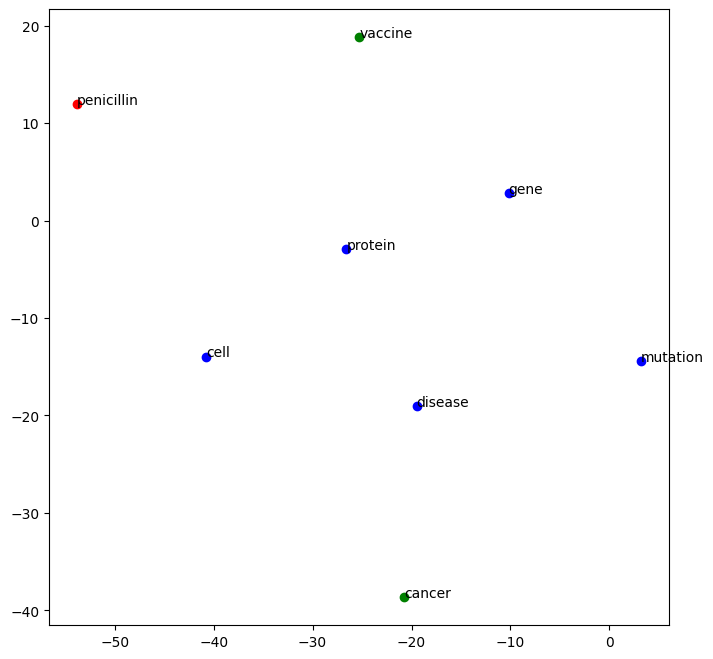

In [ ]:
 from transformers import AutoTokenizer, AutoModel
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Define a list of words to cluster
words = ['gene', 'protein', 'mutation', 'cell', 'disease', 'cancer', 'vaccine', 'penicillin']

# Generate embeddings for the words using the BioBERT model
embeddings = []
for word in words:
    # Tokenize the word and convert it to a tensor
    input_ids = torch.tensor(tokenizer.encode(word)).unsqueeze(0)
    # Get the embeddings for the tokenized input
    with torch.no_grad():
        output = model(input_ids)
    # Extract the final hidden state of the first token (the [CLS] token)
    embedding = output[0][:, 0, :].numpy()
    embeddings.append(embedding)

# Reshape the embeddings to remove the third dimension
embeddings = np.array(embeddings)
n_samples, n_dims, _ = embeddings.shape
embeddings = embeddings.reshape(n_samples, n_dims * _)

# Apply KMeans clustering to the embeddings
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(embeddings)

# Get the labels for each word
labels = kmeans.labels_

tsne = TSNE(n_components=2, perplexity =5)
embeddings_tsne = tsne.fit_transform(embeddings)

# Plot the embeddings in a scatter plot
plt.figure(figsize=(8, 8))
colors = ['red', 'blue', 'green']
for i in range(n_clusters):
    cluster_words = [words[j] for j in range(len(words)) if labels[j] == i]
    cluster_embeddings = embeddings_tsne[labels == i]
    x = cluster_embeddings[:, 0]
    y = cluster_embeddings[:, 1]
    plt.scatter(x, y, color=colors[i])
    for j, word in enumerate(cluster_words):
        plt.annotate(word, (x[j], y[j]))
plt.show()

# **Get cosine similarity of two given words**

In [ ]:
from scipy.spatial.distance import cosine

# Input words
word1 = "gene"
word2 = "protein"

# Get embeddings for word1
inputs1 = tokenizer(word1, return_tensors='pt')
outputs1 = model(**inputs1)
embedding1 = outputs1.last_hidden_state.mean(dim=1).squeeze()

# Get embeddings for word2
inputs2 = tokenizer(word2, return_tensors='pt')
outputs2 = model(**inputs2)
embedding2 = outputs2.last_hidden_state.mean(dim=1).squeeze()

# Calculate cosine similarity
similarity = 1 - cosine(embedding1.detach().numpy(), embedding2.detach().numpy())

# Print similarity
print("Cosine similarity:", similarity)

Cosine similarity: 0.965655505657196


# **Adding the list of gene names to the vocabulary as tokens**

In [ ]:
#New approach - does it change anything

from transformers import AutoTokenizer, AutoModel


# Add the new gene names to the tokenizer vocabulary
tokenizer.add_tokens(genes)
# Load the BioBERT model
model = AutoModel.from_pretrained("bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12")

# Resize the model's embedding layer to match the new vocabulary size
model.resize_token_embeddings(len(tokenizer))



Some weights of the model checkpoint at bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12 were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Embedding(30590, 768)

In [ ]:
# Check if a specific word is in the updated vocabulary
if "AT1G22900" in tokenizer.get_vocab():
    print("word is in the updated vocabulary!")
else:
    print("word is NOT in the updated vocabulary.")

word is in the updated vocabulary!


In [ ]:
from transformers import AutoTokenizer

# Load the BioBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-base-cased-v1.1")

# Print the original vocabulary size
print("Original vocab size:", len(tokenizer))

# Define a list of words to add to the vocabulary
new_words = final

# Add the words to the vocabulary
num_added_tokens = tokenizer.add_tokens(new_words)

# Print the new vocabulary size
print("New vocab size:", len(tokenizer))

# Check if a specific word is in the updated vocabulary
if "AT1G22900" in tokenizer.get_vocab():
    print("word is in the updated vocabulary!")
else:
    print("word is NOT in the updated vocabulary.")


Original vocab size: 28996
New vocab size: 29064
word is in the updated vocabulary!


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.neighbors import NearestNeighbors

# Set up BioBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-v1.1")
model = AutoModel.from_pretrained("dmis-lab/biobert-v1.1")

# Input words
word1 = "AT1G22900"

# Get embeddings for word1
inputs1 = tokenizer(word1, return_tensors='pt')
outputs1 = model(**inputs1)
embedding1 = outputs1.last_hidden_state.mean(dim=1).squeeze().detach().numpy()

# Find the embeddings and words for all words in the vocabulary
words = list(vocab.keys())
# [:50]


vocab_embeddings = {}
for word in words:
    if len(word) >= 2:
        inputs = tokenizer(word, return_tensors='pt')
        outputs = model(**inputs)
        embedding = outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()
        vocab_embeddings[word] = embedding

# Use KNN to find the most similar words to the input word
n_neighbors = 50
nn = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
nn.fit(list(vocab_embeddings.values()))
distances, indices = nn.kneighbors([embedding1], return_distance=True)

# Print the closest words to the input word
print("Closest words to '%s':" % word1)
for i in range(n_neighbors):
    print(list(vocab_embeddings.keys())[indices[0][i]], distances[0][i])

# **Clustering Hayat's genes - the 'distribution' changes a lot based on the number of clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


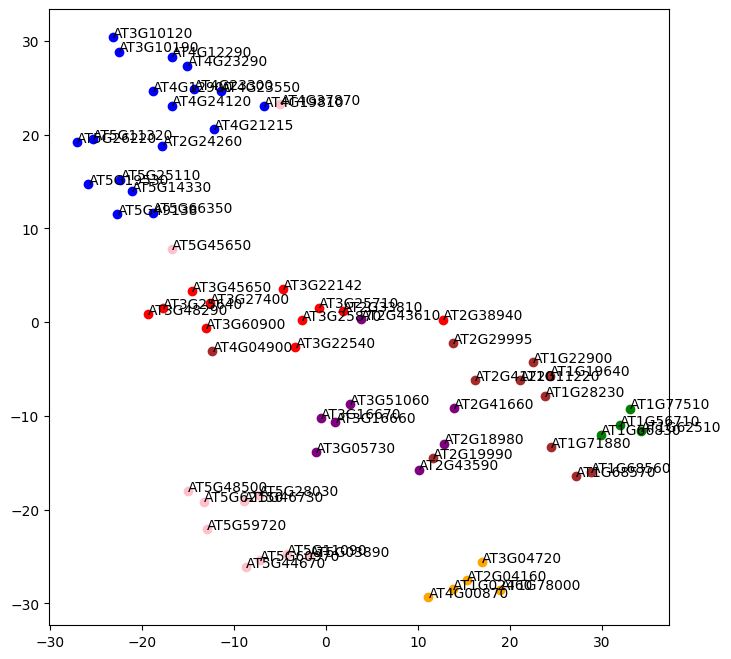

In [ ]:
 from transformers import AutoTokenizer, AutoModel
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the BioBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('dmis-lab/biobert-v1.1')
model = AutoModel.from_pretrained('dmis-lab/biobert-v1.1')

# Define a list of words to cluster
words = final

# Generate embeddings for the words using the BioBERT model
embeddings = []
for word in words:
    # Tokenize the word and convert it to a tensor
    input_ids = torch.tensor(tokenizer.encode(word)).unsqueeze(0)
    # Get the embeddings for the tokenized input
    with torch.no_grad():
        output = model(input_ids)
    # Extract the final hidden state of the first token (the [CLS] token)
    embedding = output[0][:, 0, :].numpy()
    embeddings.append(embedding)

# Reshape the embeddings to remove the third dimension
embeddings = np.array(embeddings)
n_samples, n_dims, _ = embeddings.shape
embeddings = embeddings.reshape(n_samples, n_dims * _)

# Apply KMeans clustering to the embeddings
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(embeddings)

# Get the labels for each word
labels = kmeans.labels_

tsne = TSNE(n_components=2, perplexity =5)
embeddings_tsne = tsne.fit_transform(embeddings)

# Plot the embeddings in a scatter plot
plt.figure(figsize=(8, 8))
colors = ['red', 'blue', 'green', 'orange', 'pink', 'purple', 'brown']
for i in range(n_clusters):
    cluster_words = [words[j] for j in range(len(words)) if labels[j] == i]
    cluster_embeddings = embeddings_tsne[labels == i]
    x = cluster_embeddings[:, 0]
    y = cluster_embeddings[:, 1]
    plt.scatter(x, y, color=colors[i])
    for j, word in enumerate(cluster_words):
        plt.annotate(word, (x[j], y[j]))
plt.show()

# **Only labels**

In [ ]:
from transformers import AutoTokenizer, AutoModel
import numpy as np
from sklearn.cluster import KMeans

# Load the BioBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('dmis-lab/biobert-v1.1')
model = AutoModel.from_pretrained('dmis-lab/biobert-v1.1')

# Define a list of words to cluster
words = final

# Generate embeddings for the words using the BioBERT model
embeddings = []
for word in words:
    # Tokenize the word and convert it to a tensor
    input_ids = torch.tensor(tokenizer.encode(word)).unsqueeze(0)
    # Get the embeddings for the tokenized input
    with torch.no_grad():
        output = model(input_ids)
    # Extract the final hidden state of the first token (the [CLS] token)
    embedding = output[0][:, 0, :].numpy()
    embeddings.append(embedding)

# Reshape the embeddings to remove the third dimension
embeddings = np.array(embeddings)
n_samples, n_dims, _ = embeddings.shape
embeddings = embeddings.reshape(n_samples, n_dims * _)

# Apply KMeans clustering to the embeddings
# Apply KMeans clustering to the embeddings
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(embeddings)

# Get the labels for each word
labels = kmeans.labels_

# Group words by their cluster label
cluster_words = [[] for i in range(n_clusters)]
for i in range(len(words)):
    cluster_words[labels[i]].append(words[i])

# Print the words in each cluster
for i in range(n_clusters):
    print("Cluster ", i, ": ", cluster_words[i], " Length: ", len(cluster_words[i]))




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster  0 :  ['AT3G27400', 'AT2G38940', 'AT2G29995', 'AT3G60900', 'AT3G45650', 'AT3G22142', 'AT3G25870', 'AT3G25640', 'AT3G48290', 'AT3G22540', 'AT3G25710', 'AT2G33810', 'AT2G41220']  Length:  13
Cluster  1 :  ['AT4G19810', 'AT4G23290', 'AT4G23300', 'AT2G24260', 'AT5G49138', 'AT5G66350', 'AT4G23550', 'AT5G14330', 'AT5G26220', 'AT5G11320', 'AT4G21215', 'AT3G10120', 'AT4G12290', 'AT3G10190', 'AT4G24120', 'AT5G19530', 'AT5G25110', 'AT4G12900']  Length:  18
Cluster  2 :  ['AT4G37870', 'AT5G62150', 'AT5G11090', 'AT2G43610', 'AT5G46730', 'AT5G45650', 'AT5G60970', 'AT5G44670', 'AT5G48500']  Length:  9
Cluster  3 :  ['AT3G16670', 'AT2G43590', 'AT3G16660', 'AT2G19990', 'AT2G41660', 'AT3G51060', 'AT3G05730', 'AT2G18980', 'AT4G04900', 'AT5G03890', 'AT5G28030', 'AT5G59720']  Length:  12
Cluster  4 :  ['AT3G04720', 'AT4G00870', 'AT2G04160', 'AT1G02460']  Length:  4
Cluster  5 :  ['AT1G22900', 'AT1G66830', 'AT1G77510', 'AT1G56710', 'AT1G68560', 'AT1G68570', 'AT1G19640', 'AT1G62510', 'AT1G71880', 'A

# **Trying DBSCAN instead of k-means clustering**

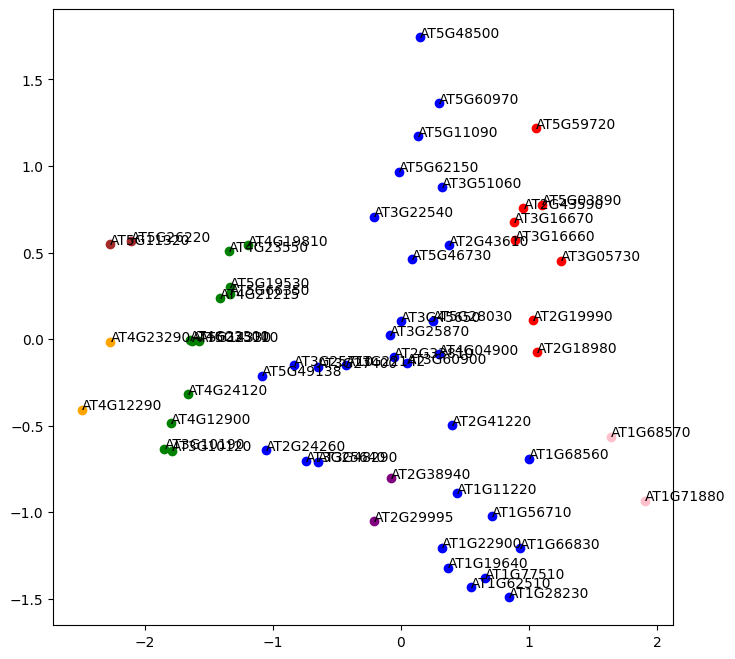

In [ ]:
from transformers import AutoTokenizer, AutoModel
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the BioBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('dmis-lab/biobert-v1.1')
model = AutoModel.from_pretrained('dmis-lab/biobert-v1.1')

# Define a list of words to cluster
words = final

# Generate embeddings for the words using the BioBERT model
embeddings = []
for word in words:
    # Tokenize the word and convert it to a tensor
    input_ids = torch.tensor(tokenizer.encode(word)).unsqueeze(0)
    # Get the embeddings for the tokenized input
    with torch.no_grad():
        output = model(input_ids)
    # Extract the final hidden state of the first token (the [CLS] token)
    embedding = output[0][:, 0, :].numpy()
    embeddings.append(embedding)

# Reshape the embeddings to remove the third dimension
embeddings = np.array(embeddings)
n_samples, n_dims, _ = embeddings.shape
embeddings = embeddings.reshape(n_samples, n_dims * _)

# Apply PCA to reduce the dimensionality of the embeddings
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Apply DBSCAN clustering to the reduced embeddings
dbscan = DBSCAN(eps=0.5, min_samples=2)
labels = dbscan.fit_predict(embeddings_pca)

# Plot the embeddings in a scatter plot
plt.figure(figsize=(8, 8))
colors = ['red', 'blue', 'green', 'orange', 'pink', 'purple', 'brown', 'gray', 'olive', 'cyan']
for i in range(np.max(labels) + 1):
    cluster_words = [words[j] for j in range(len(words)) if labels[j] == i]
    cluster_embeddings = embeddings_pca[labels == i]
    x = cluster_embeddings[:, 0]
    y = cluster_embeddings[:, 1]
    plt.scatter(x, y, color=colors[i % len(colors)])
    for j, word in enumerate(cluster_words):
        plt.annotate(word, (x[j], y[j]))
plt.show()


# **Importing the csv file with genes + protein properties**